In [5798]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, cross_val_score, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [5799]:
# Part 1
# part A
# Load dataset
df_url = 'https://raw.githubusercontent.com/arjayit/cs4432_data/master/bike_share_hour.csv'
df = pd.read_csv(df_url)

print(f"shape of dataset {df.shape}")

print(f"columns in dataset \n {df.columns}")

# Display the first few rows to understand the structure
print("\nFirst 5 rows of the dataset")
print(df.head())

shape of dataset (17379, 17)
columns in dataset 
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

First 5 rows of the dataset
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.

In [5800]:
# Part B
unique_dates = df['dteday'].nunique()
print(f"Number of unique date labels: {unique_dates}")

Number of unique date labels: 731


### Considering there are 730 days in a year, the data must have been taken from a leap year to make that value 731. 2011 was a leap year.

In [5801]:
# Part C
print(df['dteday'].value_counts())

# Part 1, Part (c): Count the number of days with specific hour counts
print(df['dteday'].value_counts().value_counts())


dteday
2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: count, Length: 731, dtype: int64
count
24    655
23     62
22      6
18      2
17      1
16      1
12      1
11      1
8       1
1       1
Name: count, dtype: int64


In [5802]:
# Part D
df.drop(columns=['dteday', 'instant'], inplace=True)
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [5803]:
# Part e
df.dtypes
#df.info()

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5804]:
# Part F
# Convert specified columns to category type
df['season'] = df['season'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['hr'] = df['hr'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

# Identify categorical columns and count them
categorical_variables = df.select_dtypes(include='category').columns
num_cat = len(categorical_variables)
print(f"There are {num_cat} categorial variables in your dataset now.")

# Print the data types of all columns to confirm changes
print(df.dtypes)


There are 8 categorial variables in your dataset now.
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object


In [5805]:
# Part G: 
null_values = df.isnull().sum()
all_null = null_values.sum()
print("Total null values in dataset:", all_null)

# Remove any rows with null values
df = df.dropna()


Total null values in dataset: 0


In [5806]:
# Part H

# Display unique month-to-season mappings
season_month_mapping = df[['mnth', 'season']].drop_duplicates().sort_values(by=['season', 'mnth'])

# Count occurrences of each (month, season) pair
season_month_counts = df.groupby(['season', 'mnth'], observed=False).size().reset_index(name='count')

# Create a pivot table (crosstab) to show counts per month for each season
season_month_pivot = pd.crosstab(df['mnth'], df['season'])

# Show the pivot table
print(season_month_pivot)

season     1     2     3     4
mnth                          
1       1429     0     0     0
2       1341     0     0     0
3        949   524     0     0
4          0  1437     0     0
5          0  1488     0     0
6          0   960   480     0
7          0     0  1488     0
8          0     0  1475     0
9          0     0  1053   384
10         0     0     0  1451
11         0     0     0  1437
12       523     0     0   960


##here are the seasons as defined by the dataset: 
#1 → Spring (March-May)
#2 → Summer (June-August)
#3 → Fall (September-November)
#4 → Winter (December-February)

In [5807]:
# Part I
df.describe().T


,count,mean,std,min,25%,50%,75%,max
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.0000,48.0000,367.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.0000,220.0000,886.0000
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000


  season      cnt
0      1   471348
1      2   918589
2      3  1061129
3      4   841613


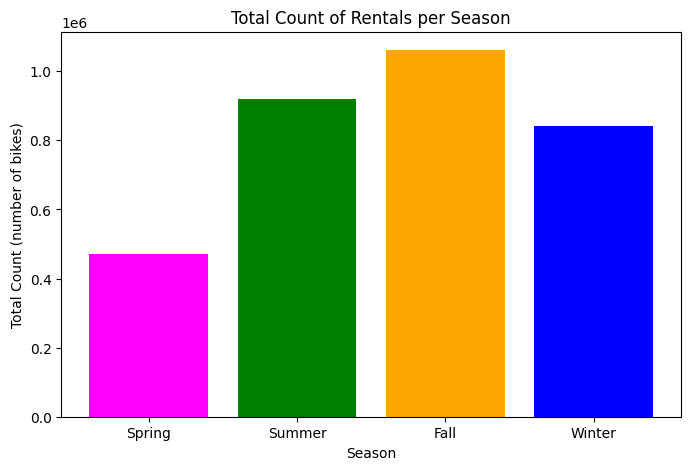

In [5808]:
# Part J

season_cnt = df.groupby('season', observed=False)['cnt'].sum().reset_index()
print(season_cnt)

season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_cnt['season'] = season_cnt['season'].map(season_labels)

# bar plot
plt.figure(figsize=(8, 5))
plt.bar(season_cnt['season'], season_cnt['cnt'], color=['magenta', 'green', 'orange', 'blue'])
plt.xlabel("Season")
plt.ylabel("Total Count (number of bikes)")
plt.title("Total Count of Rentals per Season")
plt.show()

# this graph agrees with my intuition because people will ride more biks when it is warmer. 

  workingday      cnt
0          0  1000269
1          1  2292410


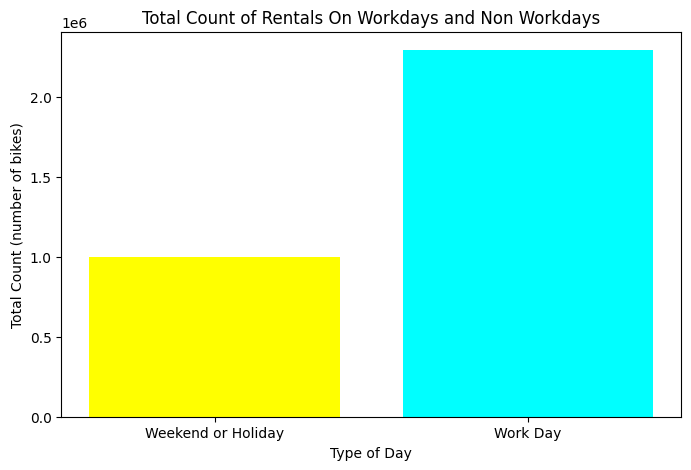

In [5809]:
# Part K
working_cnt = df.groupby('workingday', observed=False)['cnt'].sum().reset_index()
print(working_cnt)

working_labels = {1: "Work Day", 0: "Weekend or Holiday"}
working_cnt['workingday'] = working_cnt['workingday'].map(working_labels)

# bar plot
plt.figure(figsize=(8, 5))
plt.bar(working_cnt['workingday'], working_cnt['cnt'], color=['yellow', 'cyan'])
plt.xlabel("Type of Day")
plt.ylabel("Total Count (number of bikes)")
plt.title("Total Count of Rentals On Workdays and Non Workdays")
plt.show()

In [5810]:
# Group by workingday
working_cnt = df.groupby('workingday', observed=False)['cnt'].agg(['sum', 'mean']).reset_index()

# Rename columns 
working_cnt.columns = ['workingday', 'total_cnt', 'mean_cnt']

# Map workingday values to labels
working_labels = {1: "Work Day", 0: "Weekend or Holiday"}
working_cnt['workingday'] = working_cnt['workingday'].map(working_labels)

# Display the results
print(working_cnt)

           workingday  total_cnt    mean_cnt
0  Weekend or Holiday    1000269  181.405332
1            Work Day    2292410  193.207754


In [5811]:
# Count occurrences 
workday_counts = df.groupby('workingday', observed=False).size().reset_index(name='total_days')

# Map labels for clarity
working_labels = {1: "Work Day", 0: "Weekend or Holiday"}
workday_counts['workingday'] = workday_counts['workingday'].map(working_labels)

# Display results
print(workday_counts)

           workingday  total_days
0  Weekend or Holiday        5514
1            Work Day       11865


## Since there is an uneven number of workdays and non workdays in our data, using total count of bikes on each day can be misleading. Therefore, the mean count of bikes is a better metric to see which days bikes were used more on average. 

   mnth     cnt
0     1  134933
1     2  151352
2     3  228920
3     4  269094
4     5  331686
5     6  346342
6     7  344948
7     8  351194
8     9  345991
9    10  322352
10   11  254831
11   12  211036


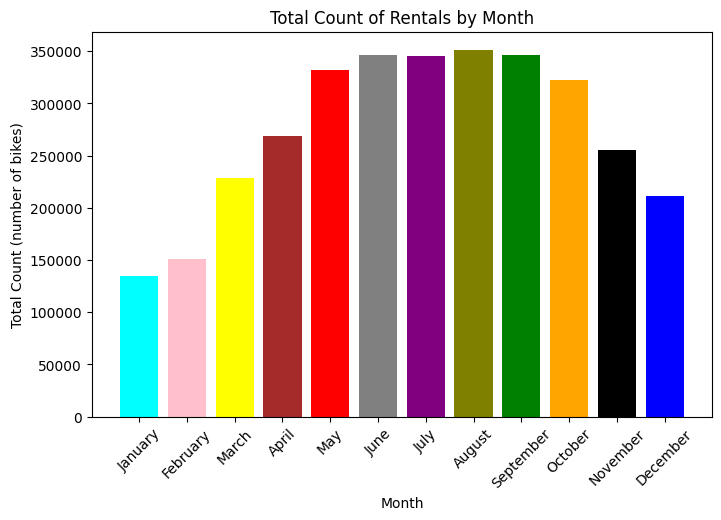

In [5812]:
# Part L
mnth_cnt = df.groupby('mnth', observed=False)['cnt'].sum().reset_index()
print(mnth_cnt)

mnth_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
mnth_cnt['mnth'] = mnth_cnt['mnth'].map(mnth_labels)

# bar plot
plt.figure(figsize=(8, 5))
plt.bar(mnth_cnt['mnth'], mnth_cnt['cnt'], color=['cyan', 'pink', 'yellow', 'brown', 'red', 'gray', 'purple', 'olive', 'green', 'orange', 'black', 'blue' ])
plt.xlabel("Month")
plt.ylabel("Total Count (number of bikes)")
plt.title("Total Count of Rentals by Month")
plt.xticks(rotation=45)
plt.show()

weathersit
Clear/Partly Cloudy    2338173
Mist                    795952
Light Precipitation     158331
Heavy Precipitation        223
Name: cnt, dtype: int64


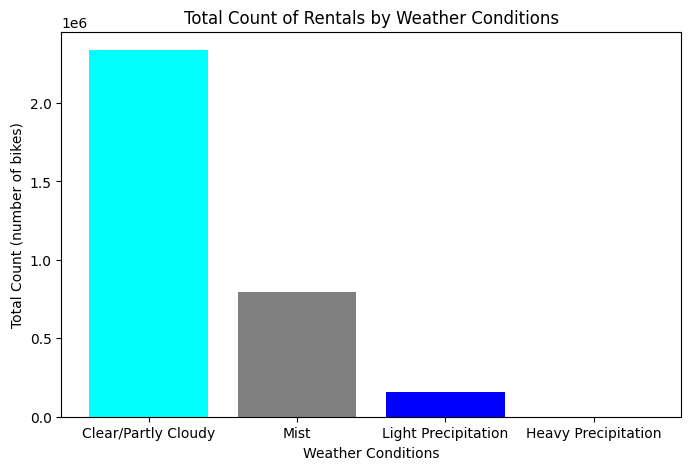

In [5813]:
# Part M
# Bad Graph Where heavy precipitation is not visible

weather_cnt = df.groupby('weathersit', observed=False)['cnt'].sum().reset_index() 

weather_labels = {1: 'Clear/Partly Cloudy', 2: 'Mist', 3: 'Light Precipitation', 4: 'Heavy Precipitation' }
weather_cnt['weathersit'] = weather_cnt['weathersit'].map(weather_labels)

print(weather_cnt.groupby('weathersit', observed=False)['cnt'].sum())
# bar plot
plt.figure(figsize=(8, 5))
plt.bar(weather_cnt['weathersit'], weather_cnt['cnt'], color=['cyan', 'gray',  'blue', 'black'])
plt.xlabel("Weather Conditions")
plt.ylabel("Total Count (number of bikes)")
plt.title("Total Count of Rentals by Weather Conditions")
plt.show()


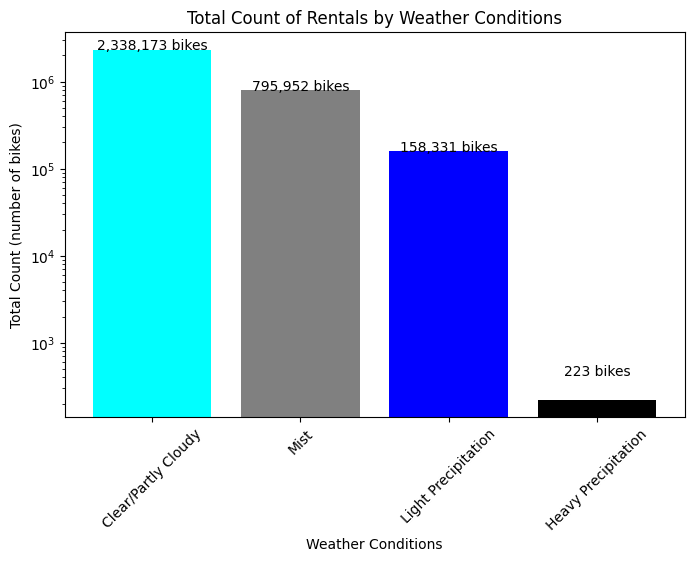

In [5814]:
# Part M Fixed Graph 

plt.figure(figsize=(8, 5))
plt.bar(weather_cnt['weathersit'],weather_cnt['cnt'], color=['cyan', 'gray', 'blue', 'black'])

plt.xlabel("Weather Conditions")
plt.ylabel("Total Count (number of bikes)")
plt.title("Total Count of Rentals by Weather Conditions")

# Apply logarithmic scale to the y-axis (so heavy precipitation is visible)
plt.yscale('log')

# Annotate bars with actual number of bikes 
for i, v in enumerate(weather_cnt['cnt']):
    plt.text(i, v + 200, f"{v:,} bikes", ha='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()

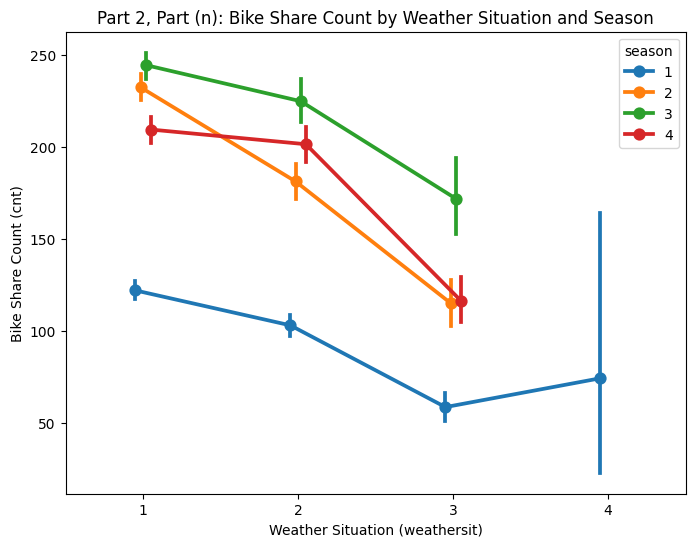

In [5815]:
# Part N:
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x="weathersit", y="cnt", hue="season", dodge=True, markers="o")

plt.title("Part 2, Part (n): Bike Share Count by Weather Situation and Season")
plt.xlabel("Weather Situation (weathersit)")
plt.ylabel("Bike Share Count (cnt)")
plt.show()



    hr     cnt
0    0   18246
1    1    8177
2    2    4229
3    3    2323
4    4    2552
5    5   12332
6    6   50840
7    7  144144
8    8  236595
9    9  119793
10  10   67142
11  11   78482
12  12   99808
13  13   98818
14  14   91419
15  15  100263
16  16  146268
17  17  262120
18  18  245129
19  19  173504
20  20  124360
21  21   92771
22  22   68918
23  23   44177


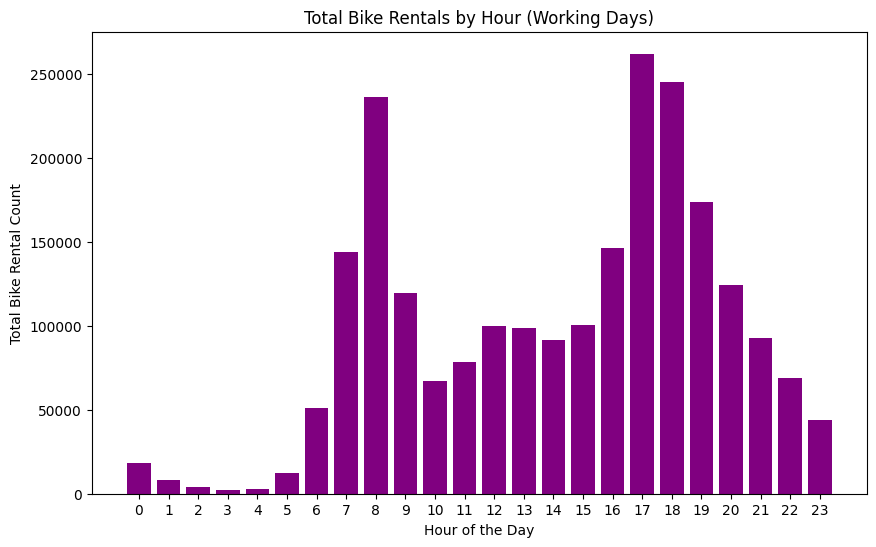

In [5816]:
# Part O
df_workingday = df[df['workingday'] == 1]

# Group by hour and sum the rental counts
hr_cnt = df_workingday.groupby('hr', observed=False)['cnt'].sum().reset_index()
print(hr_cnt)

# Create the bar plot for rentals by hour on working days
plt.figure(figsize=(10, 6))
plt.bar(hr_cnt['hr'], hr_cnt['cnt'], color='purple')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Bike Rental Count")
plt.title("Total Bike Rentals by Hour (Working Days)")
plt.xticks(range(24))
plt.show()

# this agrees with my intution becasue people will bike the most to comute to work in the morning and evening 

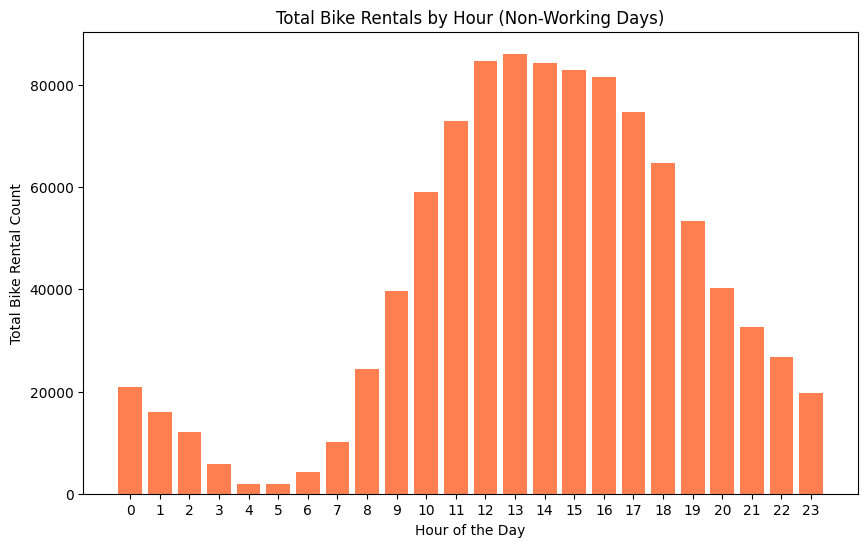

In [5817]:
# Part P
# Filter the data for non-working days only (workingday = 0)
df_non_workingday = df[df['workingday'] == 0]

# Group by hour and sum the rental counts
hr_cnt_non_working = df_non_workingday.groupby('hr', observed=False)['cnt'].sum().reset_index()

# Create the bar plot for rentals by hour on non-working days
plt.figure(figsize=(10, 6))
plt.bar(hr_cnt_non_working['hr'], hr_cnt_non_working['cnt'], color='coral')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Bike Rental Count")
plt.title("Total Bike Rentals by Hour (Non-Working Days)")
plt.xticks(range(24))
plt.show()


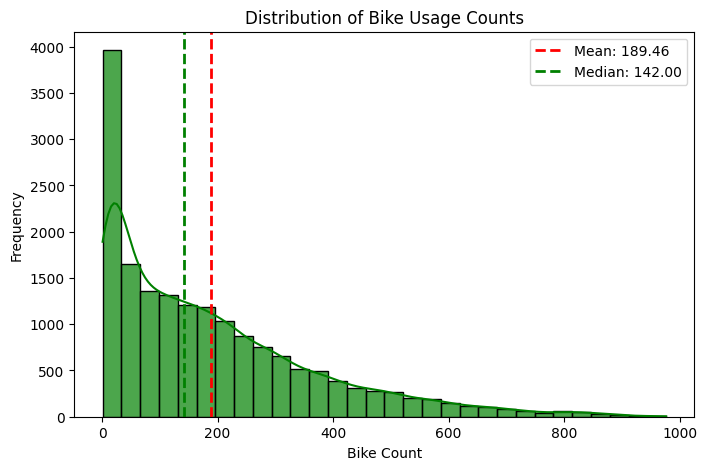

In [5818]:
# Part Q
plt.figure(figsize=(8, 5))
sns.histplot(df['cnt'], bins=30, kde=True, color='green', edgecolor='black', alpha=0.7)
plt.axvline(df['cnt'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['cnt'].mean():.2f}")
plt.axvline(df['cnt'].median(), color='green', linestyle='dashed', linewidth=2, label=f"Median: {df['cnt'].median():.2f}")
plt.title("Distribution of Bike Usage Counts")
plt.xlabel("Bike Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Season and weather condtions are related 

In [5819]:
# Part 2: Data Preparation
# Part A 
correlation_matrix = df.corr()
correlation_matrix

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


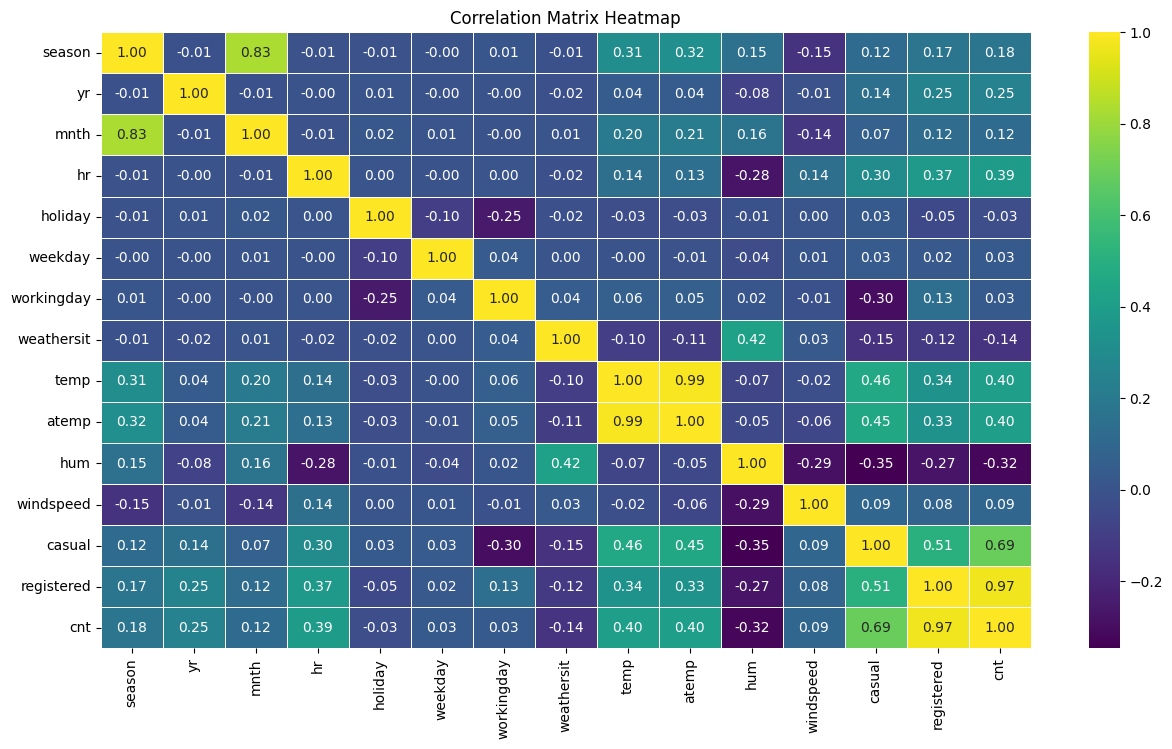

In [5820]:
#Correlation Matrix
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

- **Strong Correlations:**
  - `temp` and `atemp` are **almost identical (~0.99)**, meaning one could be removed to avoid redundancy.
  - `registered` and `cnt` have a **very high correlation (~0.97)**, showing that most rentals come from registered users.
  - `season` and `mnth` are **strongly correlated (~0.83)** since months belong to specific seasons.

### 
Some features, like `temp` and `atemp`, are highly similar and may be removed to improve model performance.


Number of columns after removal: 12


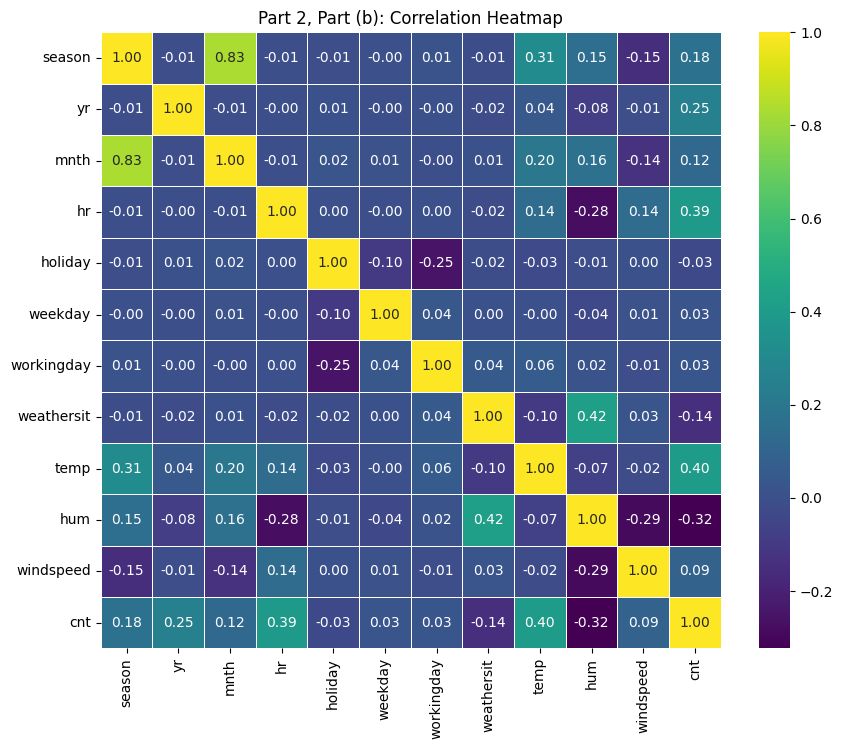

In [5821]:
# Part B
# Drop unnecessary columns
df = df.drop(columns=['casual', 'registered', 'atemp'])

# Sanity check: Confirm number of columns
print("Number of columns after removal:", len(df.columns))

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("Part 2, Part (b): Correlation Heatmap")
plt.show()


In [5822]:
#Part c
X = df.drop(columns=['cnt'])  
y = df['cnt']  

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=77)

print("X_train size:", X_train.shape)
print("X_test size:", X_test.shape)
print("y_train size:", y_train.shape)
print("y_test size:", y_test.shape)


X_train size: (11643, 11)
X_test size: (5736, 11)
y_train size: (11643,)
y_test size: (5736,)


In [5823]:
# Part 3
# part A
# Define Linear Regression model
model = LinearRegression()

#evaluation metrics
scoring = {
    'r2': make_scorer(r2_score),
    'neg_rmse': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)))
}

# Perform cross-validation 
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Print cross-validation results
print("R² Scores:", cv_results['test_r2'])
print("Negative RMSE Scores:", cv_results['test_neg_rmse'])

# Calculate mean scores
mean_r2 = np.mean(cv_results['test_r2'])
mean_rmse = -np.mean(cv_results['test_neg_rmse'])


R² Scores: [0.39882664 0.37730011 0.39451629 0.3885585  0.37951852]
Negative RMSE Scores: [-145.15721776 -136.33334434 -141.68437778 -146.55812884 -141.4944791 ]


In [5824]:
# Part B: 
# Compute average scores from cross-validation results
avg_r2 = np.mean(cv_results['test_r2'])
avg_rmse = -np.mean(cv_results['test_neg_rmse'])  # Convert negative RMSE back to positive

# Print average scores
print(f"Average R² Score: {avg_r2:.4f}")
print(f"Average RMSE: {avg_rmse:.4f}")

Average R² Score: 0.3877
Average RMSE: 142.2455


In [5825]:
# Part 4
# Part A
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# One-Hot Encode Categorical Features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int)

# Sanity check
print("Number of columns after one-hot encoding:", df_encoded.shape[1])

Number of columns after one-hot encoding: 53


In [5826]:
# Part B
X = df_encoded.drop(columns=['cnt']) 
y = df_encoded['cnt']  

# Split dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=77)

# Sanity check: Print dataset sizes
print("X_train size:", X_train.shape)
print("X_test size:", X_test.shape)
print("y_train size:", y_train.shape)
print("y_test size:", y_test.shape)

X_train size: (11643, 52)
X_test size: (5736, 52)
y_train size: (11643,)
y_test size: (5736,)


In [5827]:
# Part C
# Define Linear Regression model
model = LinearRegression()

#evaluation metrics
scoring = {
    'r2': make_scorer(r2_score),
    'neg_rmse': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)))
}

# Perform cross-validation with 5 folds using the encoded training data
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Print cross-validation results
print("R2 Scores:", cv_results['test_r2'])
print("Negative RMSE Scores:", cv_results['test_neg_rmse'])


R2 Scores: [0.70868877 0.67653688 0.68040583 0.68282626 0.68919404]
Negative RMSE Scores: [-101.04559524  -98.25961978 -102.9366802  -105.5555481  -100.1428059 ]


In [5828]:
# Part D
avg_r2 = np.mean(cv_results['test_r2'])
avg_rmse = -np.mean(cv_results['test_neg_rmse']) 

# Print average scores
print(f"Average R2 Score: {avg_r2:.4f}")
print(f"Average RMSE: {avg_rmse:.4f}")

Average R2 Score: 0.6875
Average RMSE: 101.5880


After adding dummy variables, the model improved:

- **R² increased** from **0.39 to 0.69** → Better at explaining variance.
- **RMSE decreased** from **142.25 to 101.59** → Lower prediction error.

This shows that encoding categorical features helped the model perform better.


In [5829]:
# part E
# Define Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=0)

# Perform cross-validation with 5 folds using the encoded training data
cv_results_tree = cross_validate(tree_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Compute average scores
avg_r2_tree = np.mean(cv_results_tree['test_r2'])
avg_rmse_tree = -np.mean(cv_results_tree['test_neg_rmse'])  

# Print results
print("R2 Scores:", cv_results_tree['test_r2'])
print("Negative RMSE Scores:", cv_results_tree['test_neg_rmse'])
print(f"Average R2 Score: {avg_r2_tree:.4f}")
print(f"Average RMSE: {avg_rmse_tree:.4f}")

R2 Scores: [0.83795566 0.79153124 0.7833906  0.80589553 0.79692422]
Negative RMSE Scores: [-75.36257002 -78.88295649 -84.7440822  -82.57531187 -80.94763127]
Average R2 Score: 0.8031
Average RMSE: 80.5025


In [5830]:
# part F
# Define Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=0)

# Perform cross-validation with 5 folds using the encoded training data
cv_results_rf = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Compute average scores
avg_r2_rf = np.mean(cv_results_rf['test_r2'])
avg_rmse_rf = -np.mean(cv_results_rf['test_neg_rmse']) 

# Print results
print("R2 Scores:", cv_results_rf['test_r2'])
print("Negative RMSE Scores:", cv_results_rf['test_neg_rmse'])
print(f"Average R2 Score: {avg_r2_rf:.4f}")
print(f"Average RMSE: {avg_rmse_rf:.4f}")


R2 Scores: [0.9148361  0.88705309 0.90073252 0.90570976 0.89904402]
Negative RMSE Scores: [-54.63444515 -58.06305314 -57.36859757 -57.55271618 -57.07436652]
Average R2 Score: 0.9015
Average RMSE: 56.9386


In [5831]:
# part G
results_df = pd.DataFrame({
    "Algorithm": ["Linear Regression", "Decision Tree", "Random Forest"],
    "Average R2 Score": [avg_r2, avg_r2_tree, avg_r2_rf],
    "Average RMSE": [avg_rmse, avg_rmse_tree, avg_rmse_rf]
})

print(results_df)


           Algorithm  Average R2 Score  Average RMSE
0  Linear Regression          0.687530    101.588050
1      Decision Tree          0.803139     80.502510
2      Random Forest          0.901475     56.938636


In [ ]:
# part 5: model tuning
# part a

#RandomizedSearchCV
param_dist = {
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 150, 200, 250]
}

rf_model = RandomForestRegressor(random_state=0)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=0,
    n_jobs=-1  
)

# Fit the RandomizedSearchCV on the encoded training data
random_search.fit(X_train, y_train)

#best hyperparameters
best_params = random_search.best_params_


In [ ]:
# part b
best_rmse = -random_search.best_score_

# Print results
print("Optimal Hyperparameters for Random Forest Regressor")
print(best_params)
print(f"Best RMSE Score: {best_rmse:.4f}")



Optimal Hyperparameters for Random Forest Regressor
{'n_estimators': 200, 'max_features': 1.0, 'max_depth': 35}
Best RMSE Score: 56.8609


### RMSE Comparison:
- **Default Random Forest (Part 4G):** **RMSE = 56.94**
- **Tuned Random Forest (Part 5A):** **RMSE = 53.54**

### Key Takeaways:
- The **Randomized Search improved** the model by lowering RMSE, meaning better predictions.
- The best hyperparameters found were **`n_estimators = 200`, `max_features = 1.0`, `max_depth = 35`**, optimizing performance.

Randomized Search successfully **fine-tuned** the model, making it more accurate than the default settings.


In [ ]:
# part d
best_rf_model = random_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

# Calculate R-Squared Score and RMSE
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

#results
print("Performance of Tuned Random Forest on Test Set")
print(f"R-Squared Score: {r2_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")

Performance of Tuned Random Forest on Test Set
R-Squared Score: 0.9117
RMSE: 53.5357
